In [23]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from helper_functions import plot_setup
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_style('white')
plot_setup()
import warnings
warnings.filterwarnings('ignore')

# Loading and preparing the data

We are working with the [Titanic Dataset](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html). [...more on the dataset...]

Typical datasets are messy. They require preprocessing to get the data into a format which a library like scikit-learn can use. Data can be missing or invalid, you might have much more data available than you'll want to use, you may need to change your data types.

[...] Somewhere here explain the task -- predicting survival based on features. [...]

In [25]:
data_url = 'https://raw.githubusercontent.com/marijavlajic/code-university-ml-workshop/master/titanic.csv'
titanic = pd.read_csv(data_url, sep = ';')

[...] Let's see what data is available to us. [...]

In [4]:
titanic.columns.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

[...] ^ Explain that `survived` is a label, everything else is a feature. [...]  
* _Remove boat, body, and home.dest from the original dataset._
* _Write out what each column represents._

[...] Decimal numbers in the dataset are expressed using commas rather than period, so we need to replace all commas in the dataframe with periods so that we can work with them properly. [...]

In [5]:
titanic.replace(',', '.', inplace = True, regex = True)

[...] When the dataset is first loaded some numeric columns are represented as object types instead so we need to convert them to numeric types. [...]

In [10]:
titanic[['age', 'fare']] = titanic[['age', 'fare']].apply(pd.to_numeric)

In [11]:
titanic['family_members'] = titanic['sibsp'] + titanic['parch']
titanic['family_status'] = 'alone'
titanic['family_status'][titanic['family_members'] != 0] = 'with family'

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Plotting the data

The first step of machine learning is understanding the data that you are working with. This helps you get a sense of which features might be the most important, which algorithms make the most sense for your data, etc.

What do you think might distinguish the people who survived the Titanic from the ones who didn't? Plot the data and see what initial insights you can get.

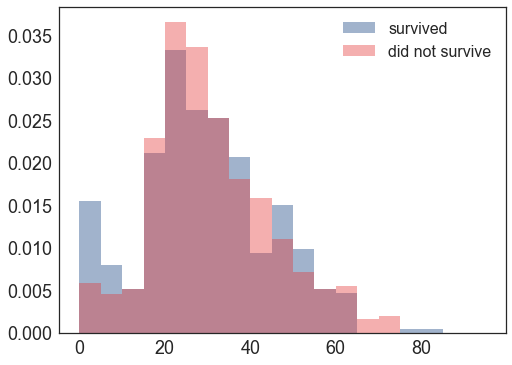

In [20]:
# ax = plt.gca()
# titanic['age'][titanic['survived'] == 1].hist(bins = range(0, 100, 5), alpha = 0.4, normed = True, label = 'survived')
# titanic['age'][titanic['survived'] == 0].hist(bins = range(0, 100, 5), alpha = 0.4, normed = True, label = 'did not survive')
# ax.legend()

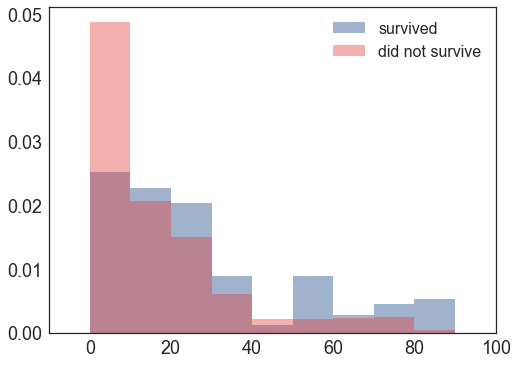

In [22]:
# ax = plt.gca()
# titanic['fare'][titanic['survived'] == 1].hist(bins = range(0, 100, 10), alpha = 0.4, normed = True, label = 'survived')
# titanic['fare'][titanic['survived'] == 0].hist(bins = range(0, 100, 10), alpha = 0.4, normed = True, label = 'did not survive')
# plt.xlim(-10, 100)
# ax.legend()

How does age affect people's likelihood of survival?

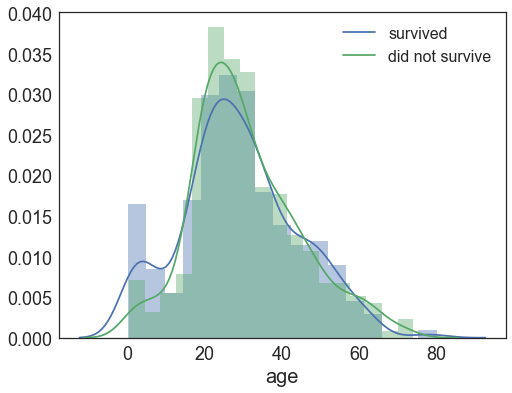

In [24]:
sns.distplot(a = titanic['age'][titanic['survived'] == 1].dropna(), kde_kws = {'label': 'survived'})
sns.distplot(a = titanic['age'][titanic['survived'] == 0].dropna(), kde_kws = {'label': 'did not survive'})

What about the price of their ticket?

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[(-20, 100)]

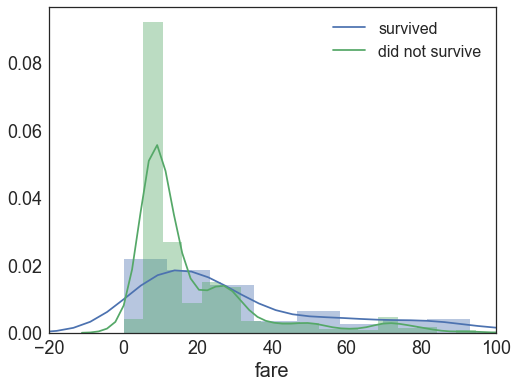

In [19]:
sns.distplot(a = titanic['fare'][titanic['survived'] == 1].dropna(), kde_kws = {'label': 'survived'})
ax = sns.distplot(a = titanic['fare'][titanic['survived'] == 0].dropna(), kde_kws = {'label': 'did not survive'})
ax.set(xlim = (-20, 100))

What else could influence whether they were going to live or die? Maybe their gender?

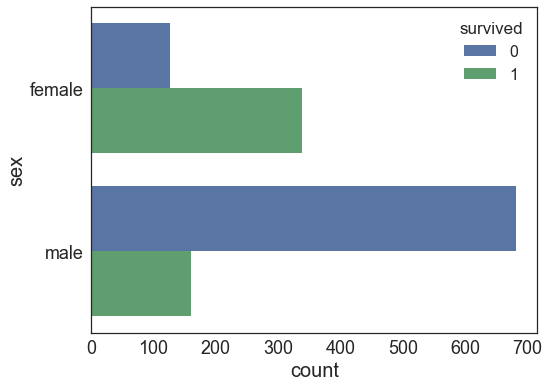

In [14]:
sns.countplot(data = titanic, y = 'sex', hue = 'survived')

_Decide between the plot above or below._

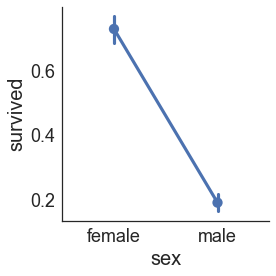

In [21]:
sns.factorplot('sex', 'survived', data = titanic)

Would their passenger class have an effect?

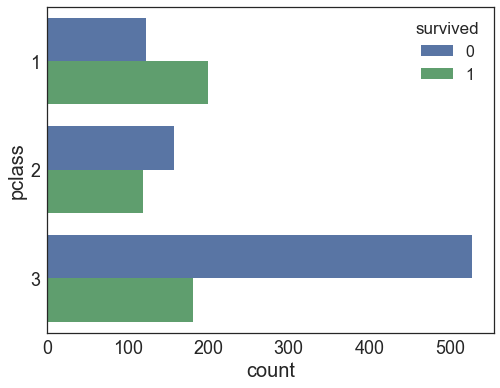

In [15]:
sns.countplot(data = titanic, y = 'pclass', hue = 'survived')

_Decide between the plot above or below._

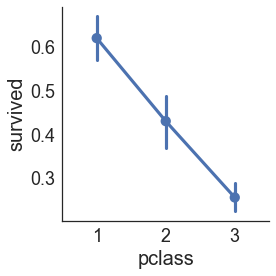

In [22]:
sns.factorplot('pclass', 'survived', data = titanic)

Now let's look at how the combination of gender and passenger class influences the survival rates.

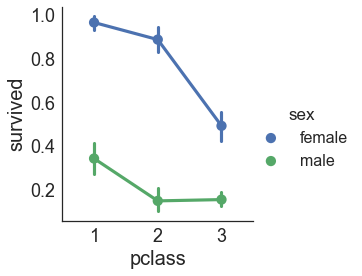

In [16]:
sns.factorplot('pclass', 'survived', hue = 'sex', data = titanic.sort_values(by = 'pclass'))

We divided people into those traveling along or with family. How did that affect whether they were going to survive?

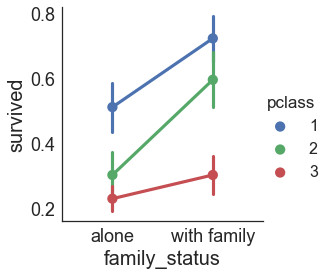

In [17]:
sns.factorplot('family_status', 'survived', hue = 'pclass', data = titanic.sort_values(by = 'family_members'))

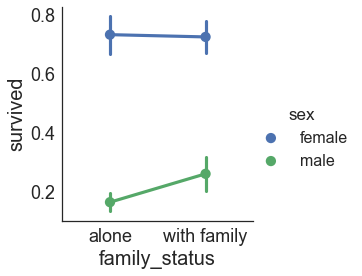

In [18]:
sns.factorplot('family_status', 'survived', hue = 'sex', data = titanic.sort_values(by = 'family_members'))